In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/LLM

Mounted at /content/drive
/content/drive/MyDrive/LLM


In [ ]:
!pip install transformers[sentencepiece] datasets sacrebleu rouge_score py7zr -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.7/106.7 kB 9.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.6/67.6 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.9/388.9 kB 18.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 22.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 411.2/411.2 kB 40.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.9/138.9 kB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB

In [ ]:
!nvidia-smi

Tue Apr 30 13:49:55 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla V100-SXM2-16GB           Off | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P0              26W / 300W |      0MiB / 16384MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
!pip install transformers[torch]
!pip install accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.6/297.6 kB 7.1 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [ ]:
from transformers import pipeline, set_seed
import random
import matplotlib.pyplot as plt
from datasets import load_dataset
import pandas as pd
from datasets import load_dataset, load_metric
from transformers import DataCollatorForSeq2Seq
from transformers import TrainingArguments, Trainer
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer
import torch
from transformers import AdamW, AutoTokenizer, AutoModelForSequenceClassification
from transformers import TrainingArguments, Trainer
from tqdm import tqdm
import torch



import nltk
from nltk.tokenize import sent_tokenize

from tqdm import tqdm
import torch

nltk.download("punkt")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
#import the pretrained model from huigging face
model='pszemraj/long-t5-tglobal-base-16384-book-summary'
tokenizer = AutoTokenizer.from_pretrained(model)


In [ ]:
#pass the model path to use the cuda(GPU) device and save
model_T5 = AutoModelForSeq2SeqLM.from_pretrained(model).to(device)

In [ ]:
#load the dataset
samsung = load_dataset('samsum')
#visualise the dataset in a dict format
#to understand the lengths and its features in terms of train, test and validation
samsung

DatasetDict({
    train: Dataset({
        features: ['id', 'dialogue', 'summary'],
        num_rows: 14732
    })
    test: Dataset({
        features: ['id', 'dialogue', 'summary'],
        num_rows: 819
    })
    validation: Dataset({
        features: ['id', 'dialogue', 'summary'],
        num_rows: 818
    })
})

In [ ]:
print(samsung["train"][1]["dialogue"])

Olivia: Who are you voting for in this election? 
Oliver: Liberals as always.
Olivia: Me too!!
Oliver: Great


In [ ]:
# Shuffle the indices of the dataset
shuffle_indices = list(range(len(samsung["train"])))
random.shuffle(shuffle_indices)

# Print the dialogue and summary of the first few shuffled examples
for i in shuffle_indices[:2]:
    print("Dialogue:")
    print(samsung["train"][i]["dialogue"])
    print("\nSummary:")
    print(samsung["train"][i]["summary"])
    print("="*50)

Dialogue:
Beatrice: Hi Marianne! How's it going?
Marianne: Hi 🙂 All good. How about you?
Beatrice: I am actually in trouble.
Beatrice: I am in Pruszków. Long story. Can you give me a ride to Warsaw?
Marianne: Lucky girl, I am free and ready to save you.
Beatrice: You are the best!
Beatrice: I'll send you the details as soon as I ask someone where I am exactly.
Marianne: Crazy. I'll be there in half an hour and you'll tell me what happened!
Beatrice: Appreciate it.

Summary:
Marianne will pick Beatrice up from Pruszków in half an hour and she will drive her to Warsaw.
Dialogue:
Carter: <file_photo> Sure it's nearly Christmas, right Chloe!?!
Chloe: Yes so it's time I bought you new socks ha
Carter: Socks serve the purpose of keeping your feet warm, why do they have to be the same 😉
Victoria: I gave up for the second dive today. Felt like Christmas under there... and to cheer me up I bought myself a new shiny piece of gold equipment....so.....definitely Christmas! Love the unmatched socks

In [ ]:
#evaluating T5 model on samsung data to check if it is suitable for the task
#using the first dialogue to confirm if it would accurately summarize it
dialogue_0 = samsung["train"][1]["dialogue"]
dialogue_0

'Olivia: Who are you voting for in this election? \r\nOliver: Liberals as always.\r\nOlivia: Me too!!\r\nOliver: Great'

In [ ]:

pipe = pipeline('summarization', model= model_T5, tokenizer= tokenizer)

In [ ]:
#Requires fine tunning because the summarization seems like a dialogue
pip_output = pipe(dialogue_0)
pip_output

Your max_length is set to 512, but your input_length is only 27. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)
/usr/local/lib/python3.10/dist-packages/transformers/modeling_utils.py:1005: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(


[{'summary_text': "Olivia asks Oliver who he's voting for in the election. Oliver says Liberals, as always."}]

In [ ]:
#function to load data in batch sizes
def generate_batch_sized_chunks(list_of_elements, batch_size):
    """split the dataset into smaller batches that we can process simultaneously
    Yield successive batch-sized chunks from list_of_elements."""
    for i in range(0, len(list_of_elements), batch_size):
        yield list_of_elements[i : i + batch_size]


In [ ]:

def calculate_metric_on_test_ds(dataset, metric, model, tokenizer,
                               batch_size=16, device=device,
                               column_text="article",
                               column_summary="highlights"):
    article_batches = list(generate_batch_sized_chunks(dataset[column_text], batch_size))
    target_batches = list(generate_batch_sized_chunks(dataset[column_summary], batch_size))

    for article_batch, target_batch in tqdm(
        zip(article_batches, target_batches), total=len(article_batches)):

        inputs = tokenizer(article_batch, max_length=1024,  truncation=True,
                        padding="max_length", return_tensors="pt")

        summaries = model.generate(input_ids=inputs["input_ids"].to(device),
                         attention_mask=inputs["attention_mask"].to(device),
                         length_penalty=0.8, num_beams=8, max_length=128)
        ''' parameter for length penalty ensures that the model does not generate sequences that are too long. '''

        # Finally, we decode the generated texts,
        # replace the  token, and add the decoded texts with the references to the metric.
        decoded_summaries = [tokenizer.decode(s, skip_special_tokens=True,
                                clean_up_tokenization_spaces=True)
               for s in summaries]

        decoded_summaries = [d.replace("", " ") for d in decoded_summaries]


        metric.add_batch(predictions=decoded_summaries, references=target_batch)

    #  Finally compute and return the ROUGE scores.
    score = metric.compute()
    return score


In [ ]:
#pass the model path to use the cuda(GPU) device and save
model_T5 = AutoModelForSeq2SeqLM.from_pretrained(model).to(device)

In [ ]:
rouge_metric = load_metric('rouge', trust_remote_code=True)

score_1 = calculate_metric_on_test_ds(samsung['test'], rouge_metric, model_T5, tokenizer, batch_size=8, column_text= 'dialogue', column_summary='summary')

  0%|          | 0/103 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/modeling_utils.py:1005: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(
100%|██████████| 103/103 [09:24<00:00,  5.48s/it]


In [ ]:
# Define Rouge metric names to evaluate the quality of text summaries
rouge_names = ["rouge1", "rouge2", "rougeL", "rougeLsum"]

# Calculate F-measure for each Rouge metric
rouge_dict = dict((rn, score_1[rn].mid.fmeasure ) for rn in rouge_names )

# Create a DataFrame from the Rouge dictionary
# Each Rouge metric becomes a column, and the index is set to 'T5' (model identifier)
rouge = pd.DataFrame(rouge_dict, index = ['T5'])

In [ ]:
rouge

,rouge1,rouge2,rougeL,rougeLsum
T5,0.018968,0.000145,0.018831,0.018858


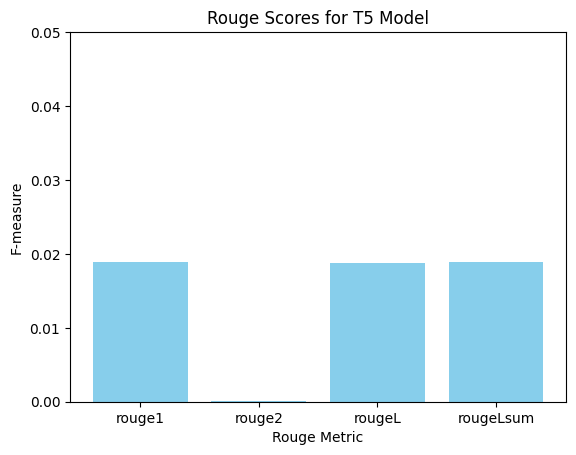

In [ ]:
#print("Column Names:", rouge.columns)
plt.bar(rouge.columns, rouge.values[0], color='skyblue')
plt.xlabel('Rouge Metric')
plt.ylabel('F-measure')
plt.title('Rouge Scores for T5 Model')
plt.ylim(0, 0.05)  # Set y-axis limit
plt.show()

In [ ]:
#maximum length of both the dialogue and summary
dialogue_token_len = len([tokenizer.encode(s) for s in samsung['train']['dialogue']])

summary_token_len = len([tokenizer.encode(s) for s in samsung['train']['summary']])


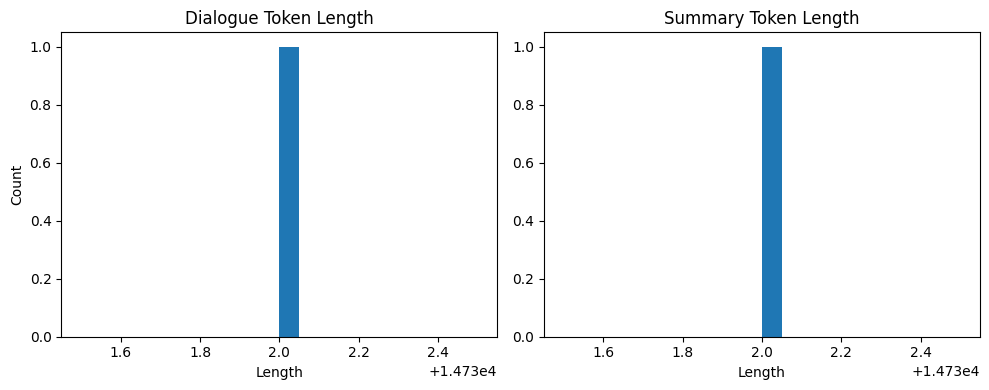

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes[0].hist(dialogue_token_len, bins = 20)
axes[0].set_title("Dialogue Token Length")
axes[0].set_xlabel("Length")
axes[0].set_ylabel("Count")

axes[1].hist(summary_token_len, bins = 20)
axes[1].set_title("Summary Token Length")
axes[1].set_xlabel("Length")
plt.tight_layout()
plt.show()


In [ ]:
# function to take example batch as input
#and convert to features suitable for training a model
def convert_examples_to_features(example_batch):
 #maximum lengths supported by the train model
    input_encodings = tokenizer(example_batch['dialogue'] , max_length = 1024, truncation = True )

    with tokenizer.as_target_tokenizer():
        target_encodings = tokenizer(example_batch['summary'], max_length =142, truncation = True )

    return {
        'input_ids' : input_encodings['input_ids'],
        'attention_mask': input_encodings['attention_mask'],
        'labels': target_encodings['input_ids']
    }

# Map the conversion function to the dataset and batch the output
#converts to a numerical dataset
dataset_samsum_pt = samsung.map(convert_examples_to_features, batched = True)

Map:   0%|          | 0/14732 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:3921: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(


Map:   0%|          | 0/819 [00:00<?, ? examples/s]

Map:   0%|          | 0/818 [00:00<?, ? examples/s]

In [ ]:
#Apply Datcollator
# necessary in preparing data for training Seq2Seq models
data_collator = DataCollatorForSeq2Seq(tokenizer, model=model_T5)

In [ ]:
from transformers import TrainingArguments, Trainer
#from transformers import TrainingArguments

#from transformers import TrainingArguments

trainer_args = TrainingArguments(
    output_dir='T5-Samsung',
    num_train_epochs=5,
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    warmup_steps=500,
    weight_decay=0.001,
    logging_steps=10,
    evaluation_strategy='steps',
    eval_steps=200,
    save_steps=1e6,
    gradient_accumulation_steps=16
)

In [ ]:

trainer= Trainer(model=model_T5, args=trainer_args,
                  tokenizer=tokenizer, data_collator=data_collator,
                  train_dataset=dataset_samsum_pt["train"],
                  eval_dataset=dataset_samsum_pt["validation"])

Step,Training Loss,Validation Loss
200,1.932400,1.658076
400,1.784700,1.532480
600,1.707100,1.475814
800,1.646300,1.450419
1000,1.557200,1.441154


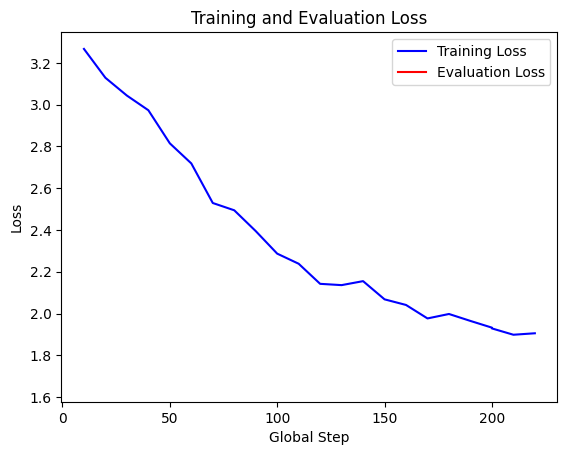

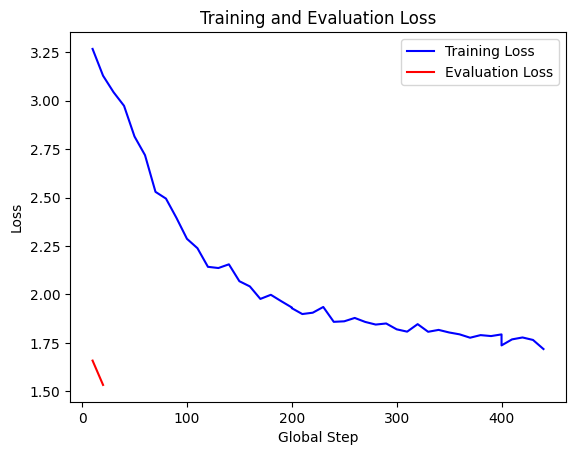

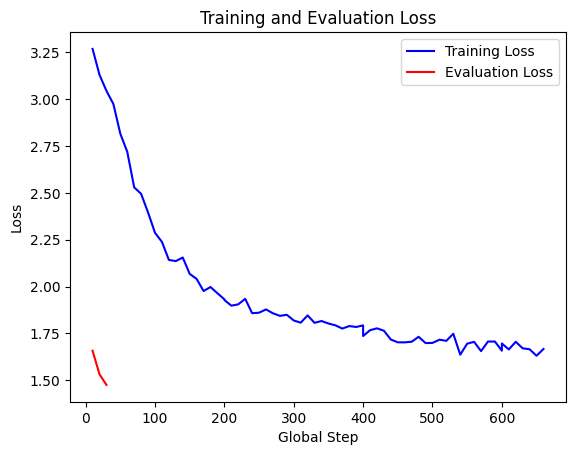

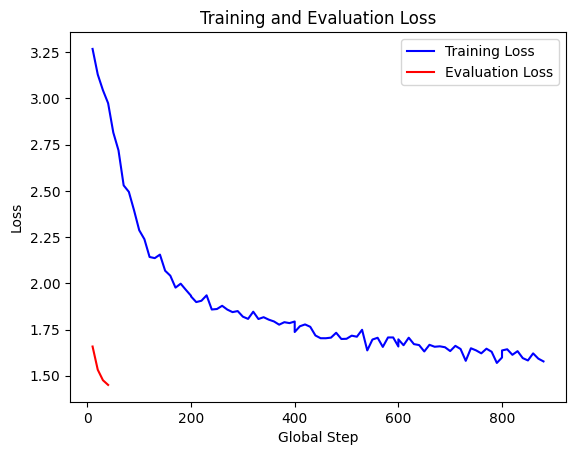

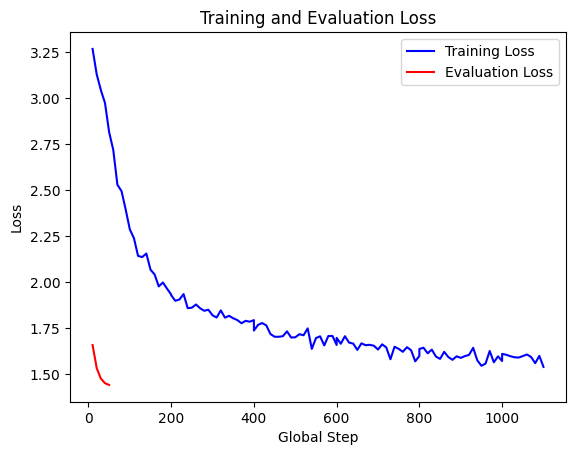

TrainOutput(global_step=1150, training_loss=1.8130467597298001, metrics={'train_runtime': 3862.6941, 'train_samples_per_second': 19.07, 'train_steps_per_second': 0.298, 'total_flos': 2.664185375232e+16, 'train_loss': 1.8130467597298001, 'epoch': 4.995927233233777})

In [ ]:
import matplotlib.pyplot as plt
from transformers import TrainerCallback

class PlotLossesCallback(TrainerCallback):
    def __init__(self):
        super().__init__()
        self.global_steps = []
        self.train_losses = []
        self.eval_losses = []

    def on_log(self, args, state, control, logs=None, **kwargs):
        if state.is_local_process_zero:
            # Extract the training and evaluation loss from the logs
            train_loss = logs.get("loss")
            eval_loss = logs.get("eval_loss")

            # Get the current step
            global_step = state.global_step

            # Store the losses and the step
            if train_loss is not None:
                self.train_losses.append(train_loss)
            if eval_loss is not None:
                self.eval_losses.append(eval_loss)
            self.global_steps.append(global_step)

    def on_epoch_end(self, args, state, control, **kwargs):
        # Plot the loss
        plt.plot(self.global_steps[:len(self.train_losses)], self.train_losses, label="Training Loss", color='b')
        if self.eval_losses:
            plt.plot(self.global_steps[:len(self.eval_losses)], self.eval_losses, label="Evaluation Loss", color='r')
        plt.xlabel("Global Step")
        plt.ylabel("Loss")
        plt.title("Training and Evaluation Loss")
        plt.legend()
        plt.show()

# Create the callback
plot_losses_callback = PlotLossesCallback()

# Assuming you have already defined model_T5, tokenizer, dataset_samsum_pt, trainer_args, and data_collator

# Create the Trainer
trainer = Trainer(
    model=model_T5,
    args=trainer_args,
    tokenizer=tokenizer,
    data_collator=data_collator,
    train_dataset=dataset_samsum_pt["train"],
    eval_dataset=dataset_samsum_pt["validation"],
    callbacks=[plot_losses_callback],
)

# Start training
trainer.train()


In [ ]:
score = calculate_metric_on_test_ds(
    samsung['test'], rouge_metric, trainer.model, tokenizer, batch_size = 2, column_text = 'dialogue', column_summary= 'summary'
)

rouge_dict = dict((rn, score[rn].mid.fmeasure ) for rn in rouge_names )

rouge_ft = pd.DataFrame(rouge_dict, index = [f'T5'] )

  0%|          | 0/410 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/modeling_utils.py:1005: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(
100%|██████████| 410/410 [06:59<00:00,  1.02s/it]


In [ ]:
rouge_ft

,rouge1,rouge2,rougeL,rougeLsum
T5,0.034754,0.000427,0.03346,0.033479


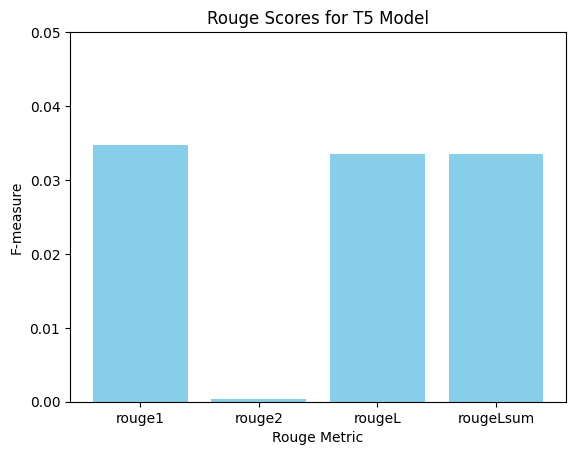

In [ ]:
#print("Column Names:", rouge.columns)
plt.bar(rouge_ft.columns, rouge_ft.values[0], color='skyblue')
plt.xlabel('Rouge Metric')
plt.ylabel('F-measure')
plt.title('Rouge Scores for T5 Model')
plt.ylim(0, 0.05)  # Set y-axis limit
plt.show()

In [ ]:
## Save model
model_T5.save_pretrained("T5-samsum-model")

Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 512, 'min_length': 8, 'early_stopping': True, 'num_beams': 2, 'repetition_penalty': 3.5, 'length_penalty': 0.8, 'no_repeat_ngram_size': 3, 'encoder_no_repeat_ngram_size': 4}


In [ ]:
## Save tokenizer
tokenizer.save_pretrained("tokenizer")


('tokenizer/tokenizer_config.json',
 'tokenizer/special_tokens_map.json',
 'tokenizer/spiece.model',
 'tokenizer/added_tokens.json',
 'tokenizer/tokenizer.json')

In [ ]:
import random


gen_kwargs = {"length_penalty": 1, "num_beams":8, "max_length": 120}

# Convert the test dataset into a list
test_data = list(samsung["test"])

# Shuffle the dataset
random.shuffle(test_data)



# Define the pipeline for summarization
pipe = pipeline("summarization", model="T5-samsum-model",tokenizer=tokenizer)

# Generate summaries for random dialogues and summaries
num_samples = 2
for i in range(num_samples):
    # Extract a random dialogue and summary from the shuffled dataset
    random_sample = random.choice(test_data)
    dialogue = random_sample["dialogue"]
    reference_summary = random_sample["summary"]

    # Generate a summary using the T5 model
    generated_summary = pipe(dialogue, **gen_kwargs)

    # Print the dialogue, reference summary, and generated summary
    print("\nDialogue:", dialogue)
    print("\nReference Summary:", reference_summary)
    print("\nGenerated Model Summary:", generated_summary[0]["summary_text"])
    print()


Your max_length is set to 120, but your input_length is only 119. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=59)
Your max_length is set to 120, but your input_length is only 103. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=51)



Dialogue: David: Morning Russ. Have you seen the report I emailed yesterday?
Russ: Hi David. Well received thank you. But I haven't read it yet.
David: Is there anything you'd like me to do right now?
Russ: I'll take a look at the report in a moment and will send you remarks if I have any.
David: Sounds good. I guess I'll just answer some emails.
Russ: Please do. I should be done by midday with the report.

Reference Summary: Russ received David's report but hasn't read it yet.

Generated Model Summary: Russ sent David a report yesterday. David hasn't seen it yet. He will look at it in midday.


Dialogue: Martha: Hey, can I ask you a question?
Ophelia: Do we know each other?
Martha: We don't, but do you mind if I ask you about the lenses from your profile picture? they are awesome and I would like to buy the similar ones
Ophelia: it's from Crazy Lenses. They have quite reasonable prices and very fast shipping.
Martha: Thanks!!! I'll check them :)
Ophelia: No problem :)

Reference Summ